# 4. Какая доля продаж приходится на каждый штат?

In [1]:
# Загрузка нужных библиотек
import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')

from IPython.display import Image, display

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Загрузка данных
df = pd.read_csv('data/df.csv')

df.date = pd.to_datetime(df.date)
df.head()

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,month,year
0,2013-01-01,1,Автомобильные товары,0.0,0,Quito,Pichincha,D,13,1,2013
1,2013-01-01,1,Уход за детьми,0.0,0,Quito,Pichincha,D,13,1,2013
2,2013-01-01,1,Косметика,0.0,0,Quito,Pichincha,D,13,1,2013
3,2013-01-01,1,Напитки,0.0,0,Quito,Pichincha,D,13,1,2013
4,2013-01-01,1,Книги,0.0,0,Quito,Pichincha,D,13,1,2013


Сделаем группировку данных по штатам и посчитаем суммарные продажи. Затем посмотрим, какой процент от общих продаж приходится на каждый штат.

In [3]:
state_count = df.groupby('state')['sales'].sum()
state_count = state_count / state_count.sum()

Посмотрим, на какие штаты приходится наибольшая доля продаж.

In [4]:
state_count.sort_values(ascending=False).head()

state
Pichincha                         0.544936
Guayas                            0.153826
Azuay                             0.045796
Tungurahua                        0.037540
Santo Domingo de los Tsachilas    0.033376
Name: sales, dtype: float64

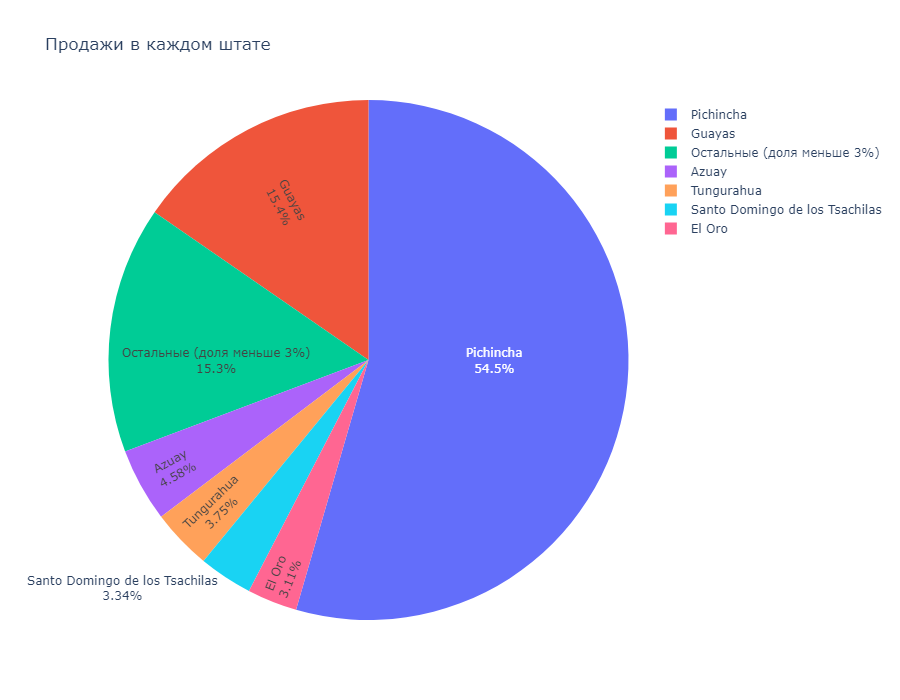

In [5]:
# Возьмем штаты с долей от общих продаж меньше 3% и просуммируем
threshold = 0.03
filtered_values = state_count[state_count < threshold]
sum_filtered = filtered_values.sum()

# Возьмем штаты с долей от общих продаж больше 3%
new_data = state_count[state_count >= threshold]
new_data['Остальные (доля меньше 3%)'] = sum_filtered

# Сделаем датафрейм
new_data = pd.DataFrame(new_data).reset_index()

# Нарисуем график
fig = go.Figure(data=[go.Pie(labels=new_data['state'], 
                             values=new_data['sales'], 
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])

fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    title_text='Продажи в каждом штате'
)

fig.show()

display(Image(filename='img/state_sales.png', width=800))

Более половины всех продаж приходится на штат Pichincha (54.5%), следом идут Guayas (15.4%), Azuay (4.5%), Tungurahua (3.75%) и Santo Domingo de los Tsachilas (3.34%).